<a href="https://colab.research.google.com/github/Hutaf/SDA-Machine-Learning/blob/main/Seattle_weather_Kmeans_ML14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment ML14

### Use the Seattle rain data an apply K-Means clustering to the dataset.


In [18]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
filepath = 'https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv'
df = pd.read_csv(filepath)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB
None
--------------------------------------------------
               PRCP          TMAX          TMIN
count  25548.000000  25551.000000  25551.000000
mean       0.106222     59.544206     44.514226
std        0.239031     12.772984      8.892836
min        0.000000      4.000000      0.000000
25%        0.000000     50.000000     38.000000
50%        0.000000     58.000000     45.000000
75%        0.100000     69.000000     52.000000
max        5.020000    103.000000     71.000000
------------------------------

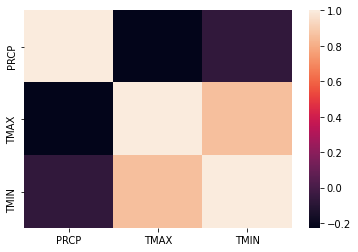

In [9]:
print('-'*50)
print(df.info())
print('-'*50)
print(df.describe())
print('-'*50)
print(df.corr())
print('-'*30)
sns.heatmap(df.corr())

In [10]:
df.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


### Preparing the Seattle weather data

In [11]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [12]:
def isNull(df, column):
  return df[pd.isnull(df[column])]

In [13]:
isNull(df, 'PRCP')

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [14]:
isNull(df, 'RAIN')

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [15]:
#df['PRCP'] = df['PRCP'].fillna(df['PRCP'].median)
#isNull(df, 'PRCP')

In [16]:
#df['RAIN'] = df['RAIN'].fillna(False)
#isNull(df, 'RAIN')

In [17]:
df = df.dropna()

# KMeans

In [20]:
X = df.loc[:, ['PRCP', 'TMAX', 'TMIN']].values
y = df['RAIN'].astype('int')

### Scaling

In [21]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# statistics of scaled data
pd.DataFrame(X_scaled).describe()

,0,1,2
count,2.554800e+04,2.554800e+04,2.554800e+04
mean,-1.109932e-15,6.933201e-16,9.419817e-16
std,1.000020e+00,1.000020e+00,1.000020e+00
min,-4.443921e-01,-4.348469e+00,-5.005528e+00
25%,-4.443921e-01,-7.471264e-01,-7.324300e-01
50%,-4.443921e-01,-1.208060e-01,5.471966e-02
75%,-2.602897e-02,7.403846e-01,8.418694e-01
max,2.055744e+01,3.402246e+00,2.978419e+00


In [23]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
# inertia on the fitted data
kmeans.inertia_

42194.039783560154

Text(0, 0.5, 'Inertia')

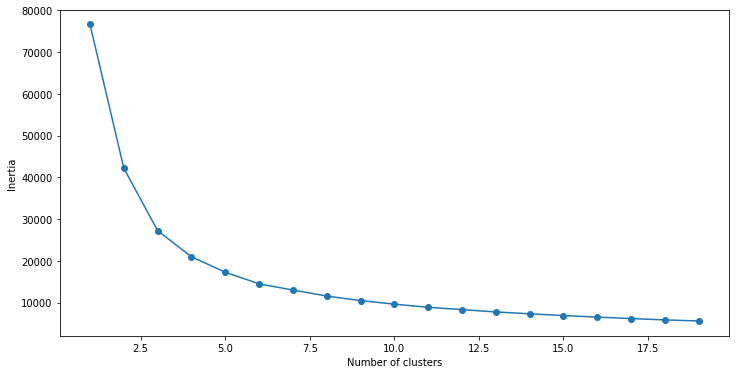

In [26]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [33]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)
frame = pd.DataFrame(X_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    8396
0    8004
4    6089
2    2605
3     454
Name: cluster, dtype: int64

In [36]:
# inertia on the fitted data
kmeans.inertia_

17266.184499231673

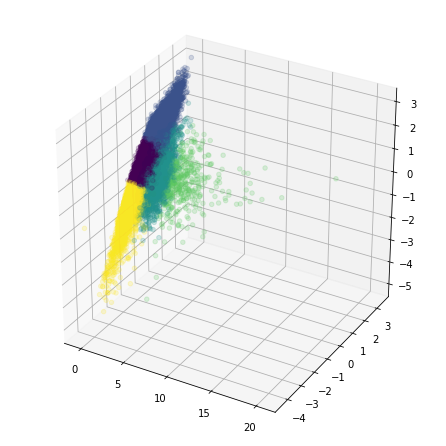

In [39]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
C = kmeans.cluster_centers_
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, alpha=0.2)
plt.show();